In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import itertools
import cv2

In [42]:
def nearest_distances_plot(nearest_distances, title, color, ylim=0.12, edgecolor=None):
    plt.hist(nearest_distances, bins=100, density=True, alpha=0.6, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Probability Density')
    plt.xlim(0, 100)
    plt.ylim(0, ylim)
    plt.grid(True)

def both_nearest_distances_plot(ctrl_nearest_distances, rett_nearest_distances, savepath, title):
    # 绘制最近距离的直方图
    plt.figure(figsize=(10, 6))
    nearest_distances_plot(ctrl_nearest_distances, title, 'blue')
    nearest_distances_plot(rett_nearest_distances, title, 'red')
    plt.savefig(f'{savepath}/{title}.png', dpi=600)
    plt.show()

In [44]:
def circle_radius(rett_radius, ctrl_radius, savepath, title, ylim=150):
    maxradii=len(rett_radius[0])
    merge_rett_radius = {radius: 0 for radius in range(maxradii)}
    merge_ctrl_radius = {radius: 0 for radius in range(maxradii)}
    
    for i in range(maxradii):
        for rett in rett_radius:
            merge_rett_radius[i] += rett[i]
        merge_rett_radius[i]/=len(rett_radius)

        for ctrl in ctrl_radius:
            merge_ctrl_radius[i] += ctrl[i]
        merge_ctrl_radius[i]/=len(ctrl_radius)
        
    plt.figure(figsize=(10, 6))
    plt.bar(merge_ctrl_radius.keys(), merge_ctrl_radius.values(), width=1, color='blue', alpha=0.6)
    plt.bar(merge_rett_radius.keys(), merge_rett_radius.values(), width=1, color='red', alpha=0.6)
    plt.title(title)
    plt.xlabel('Radius (pixels)')
    plt.ylabel('Average Number of CTCF Particles')
    plt.ylim(0,ylim)
    plt.grid(True)
    plt.savefig(f'{savepath}/{title}.png', dpi=600)
    plt.show()
    return merge_ctrl_radius, merge_rett_radius

def circle_radius_deltax(merge_ctrl_radius, merge_rett_radius, savepath, title, delta_x=1, rett="RETT"):
    color = ["blue", "red"]
    state = ["CTRL", rett]
    average_counts_per_radius = [merge_ctrl_radius, merge_rett_radius]
    
    plt.figure(figsize=(10, 6))
    for i in range(2):
        radii = np.array(list(average_counts_per_radius[i].keys()))
        counts = np.array(list(average_counts_per_radius[i].values()))
        # 计算差分值 (dy/dx)
        dy_dx = (counts[delta_x:] - counts[:-delta_x]) / delta_x 
        # 绘制差分值曲线图
        plt.plot(radii[delta_x:], dy_dx, label=state[i], color=color[i])
        plt.title(title)
        plt.xlabel('Radius (pixels)')
        plt.ylabel(f'Δy/Δx (Δx={delta_x})')
        plt.legend()
        plt.grid(True)
    plt.savefig(f'{savepath}/{title}.png', dpi=600)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for i in range(2):
        radii = np.array(list(average_counts_per_radius[i].keys()))
        counts = np.array(list(average_counts_per_radius[i].values()))
        # 计算除以 2πx*Δx 
        dy_dx_2pi = (counts[delta_x:] - counts[:-delta_x]) / (2*np.pi*(radii[delta_x:]) * delta_x)
        # dy_dx_2pi = counts[delta_x:] / (2*np.pi*(radii[delta_x:]) * delta_x)
        # 绘制差分值曲线图 - 除以 2πx*Δx
        title = f'{title} (2πxΔx)'
        plt.plot(radii[delta_x:], dy_dx_2pi, label=state[i], color=color[i])
        plt.title(title)
        plt.xlabel('Radius (pixels)')
        plt.ylabel(f'Δy/(2πxΔx) (Δx={delta_x})')
        plt.legend()
        plt.grid(True)
    plt.savefig(f'{savepath}/{title}.png', dpi=600)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for i in range(2):
        radii = np.array(list(average_counts_per_radius[i].keys()), dtype=float)
        radii[0] += 1e-1
        counts = np.array(list(average_counts_per_radius[i].values()))
        # 计算除以 4πx^2*Δx 
        dy_dx_4pi_x2 = (counts[delta_x:] - counts[:-delta_x]) / (4*np.pi*(radii[delta_x:])**2 * delta_x)
        # dy_dx_4pi_x2 = counts[delta_x:] / (4*np.pi*(radii[delta_x:])**2 * delta_x)
        # 绘制差分值曲线图 - 除以 4πx^2*Δx
        title = f'{title} (4πx^2Δx)'
        plt.plot(radii[delta_x:], dy_dx_4pi_x2, label=state[i], color=color[i])
        plt.title(title)
        plt.xlabel('Radius (pixels)')
        plt.ylabel(f'Δy/(4πx^2Δx) (Δx={delta_x})')
        plt.legend()
        plt.grid(True)
    plt.savefig(f'{savepath}/{title}.png', dpi=600)
    plt.show()

# RETT

In [41]:
datapath = '/Users/Alpaca/Desktop/Github/disease_epigenome/results_RTT/Biomarker/new_results/results_SR'
    
with open(f'{datapath}/CTRL_colocation.pkl', 'rb') as f:
    ctrl_metrics_co_localization = pickle.load(f)
with open(f'{datapath}/RETT_HPS9999_colocation.pkl', 'rb') as f:
    rett_metrics_co_localization = pickle.load(f)

ctrl_h3k27ac2ctcf_mindist = list(itertools.chain(*ctrl_metrics_co_localization['h3k27ac2ctcf_mindist']))
rett_h3k27ac2ctcf_mindist = list(itertools.chain(*rett_metrics_co_localization['h3k27ac2ctcf_mindist']))
print(f"h3k27ac2ctcf nearest_distances ctrl: {len(ctrl_h3k27ac2ctcf_mindist)}")
print(f"h3k27ac2ctcf nearest_distances rett: {len(rett_h3k27ac2ctcf_mindist)}")

ctrl_ctcf2h3k27ac_mindist = list(itertools.chain(*ctrl_metrics_co_localization['ctcf2h3k27ac_mindist']))
rett_ctcf2h3k27ac_mindist = list(itertools.chain(*rett_metrics_co_localization['ctcf2h3k27ac_mindist']))
print(f"ctcf2h3k27ac nearest_distances ctrl: {len(ctrl_ctcf2h3k27ac_mindist)}")
print(f"ctcf2h3k27ac nearest_distances rett: {len(rett_ctcf2h3k27ac_mindist)}")

h3k27ac2ctcf nearest_distances ctrl: 186086
h3k27ac2ctcf nearest_distances rett: 337114
ctcf2h3k27ac nearest_distances ctrl: 243769
ctcf2h3k27ac nearest_distances rett: 461435


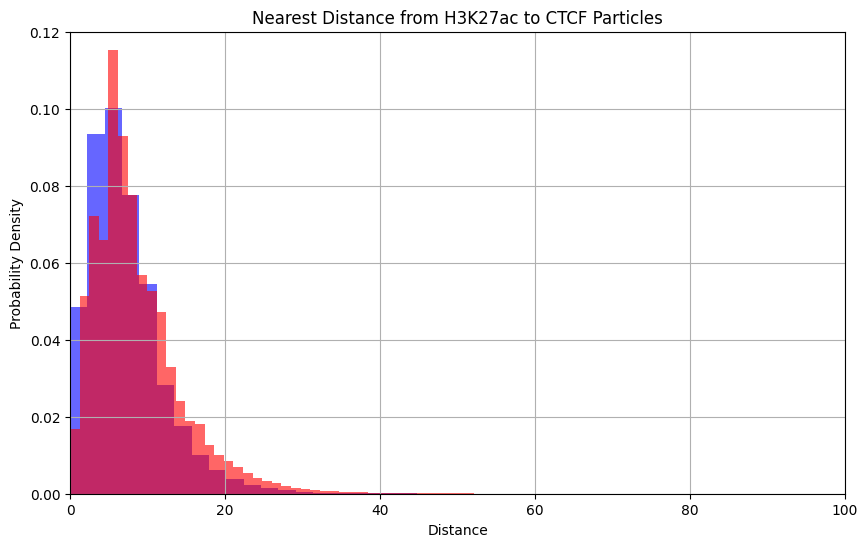

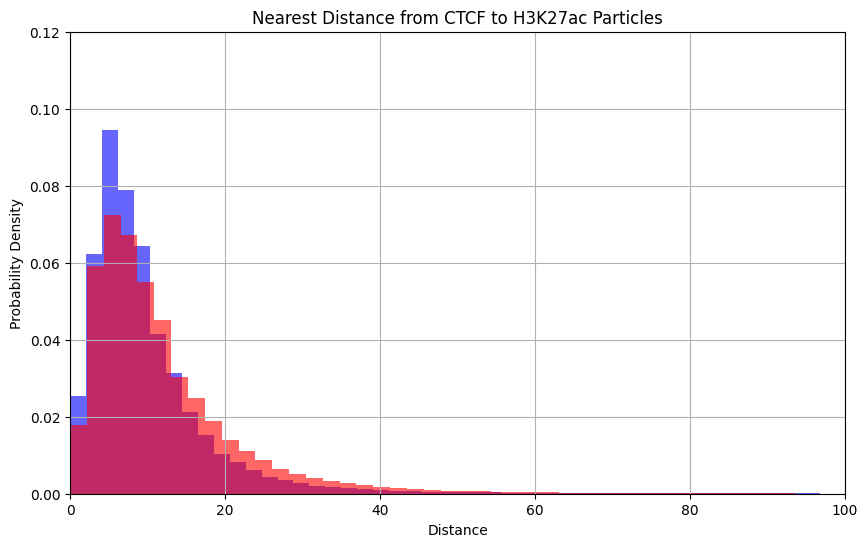

In [43]:
homepath = "/Users/Alpaca/Desktop/Github/disease_epigenome"
savepath = f"{homepath}/results_RTT/Biomarker/results_figures"
both_nearest_distances_plot(ctrl_h3k27ac2ctcf_mindist, rett_h3k27ac2ctcf_mindist, savepath, 
                            title="Nearest Distance from H3K27ac to CTCF Particles")

both_nearest_distances_plot(ctrl_ctcf2h3k27ac_mindist, rett_ctcf2h3k27ac_mindist, savepath,
                            title="Nearest Distance from CTCF to H3K27ac Particles")

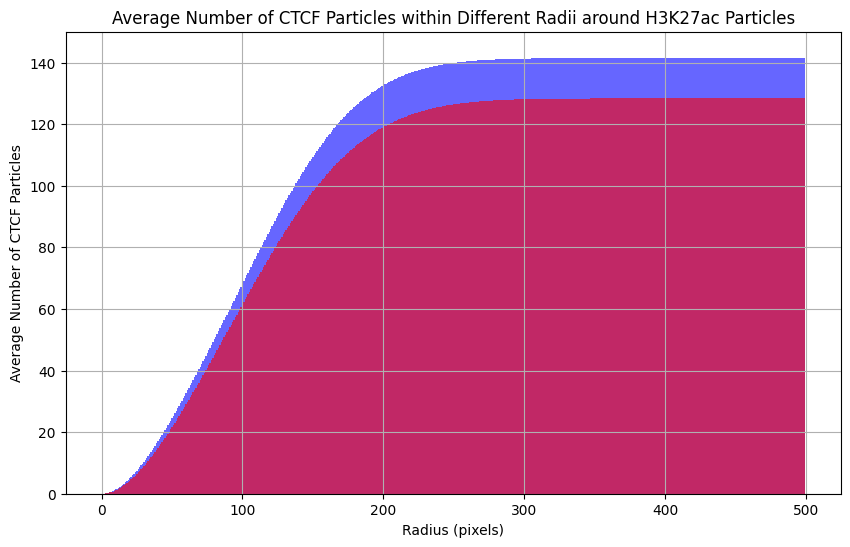

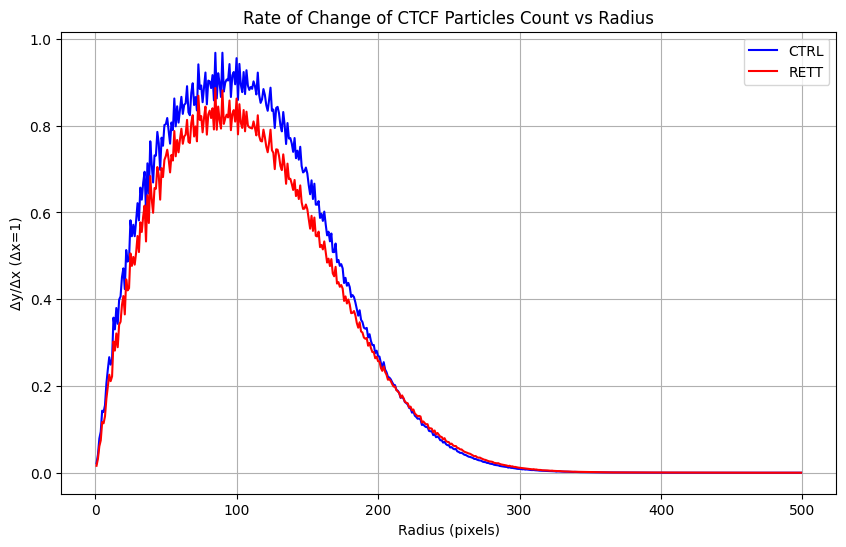

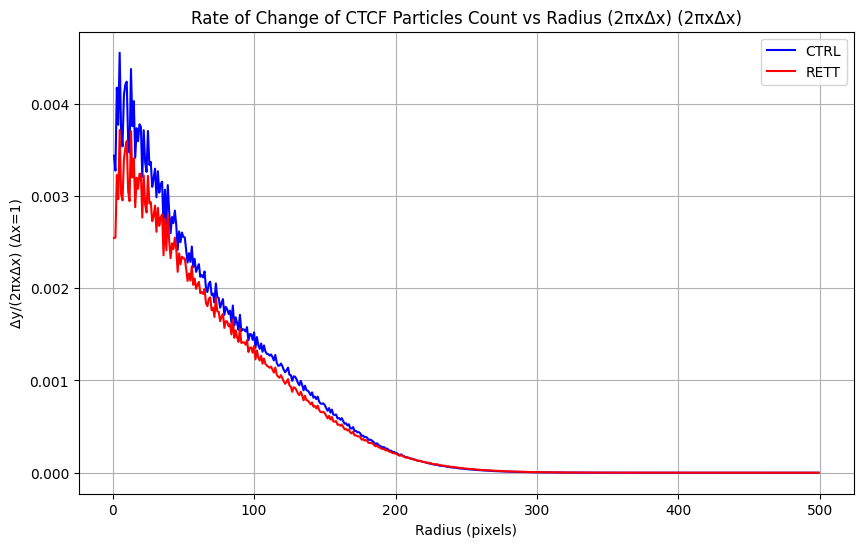

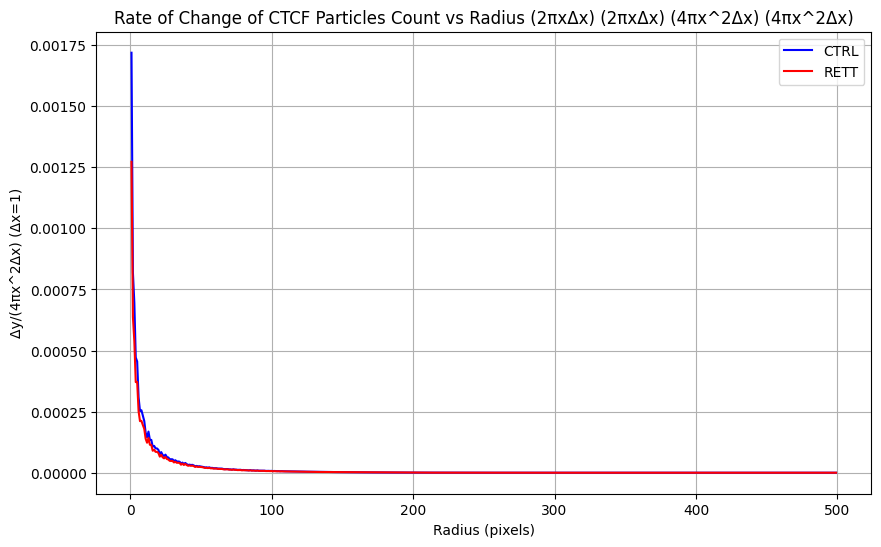

In [46]:
merge_ctrl_radius, merge_rett_radius = circle_radius(rett_metrics_co_localization['h3k27ac2ctcf_radius'], 
                                                     ctrl_metrics_co_localization['h3k27ac2ctcf_radius'], 
                                                     savepath, 
                                                     title="Average Number of CTCF Particles within Different Radii around H3K27ac Particles", 
                                                     ylim=150)
circle_radius_deltax(merge_ctrl_radius, merge_rett_radius, savepath, 
                     title='Rate of Change of CTCF Particles Count vs Radius', 
                     delta_x=1, rett="RETT")

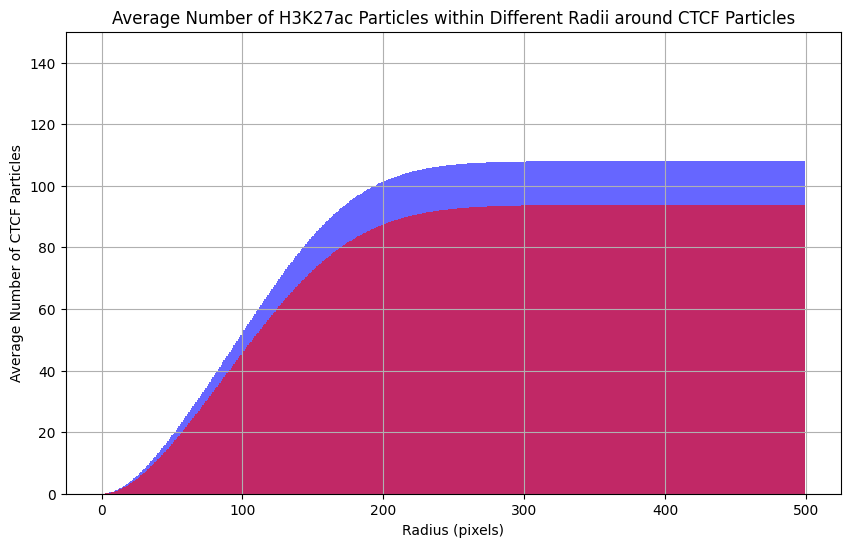

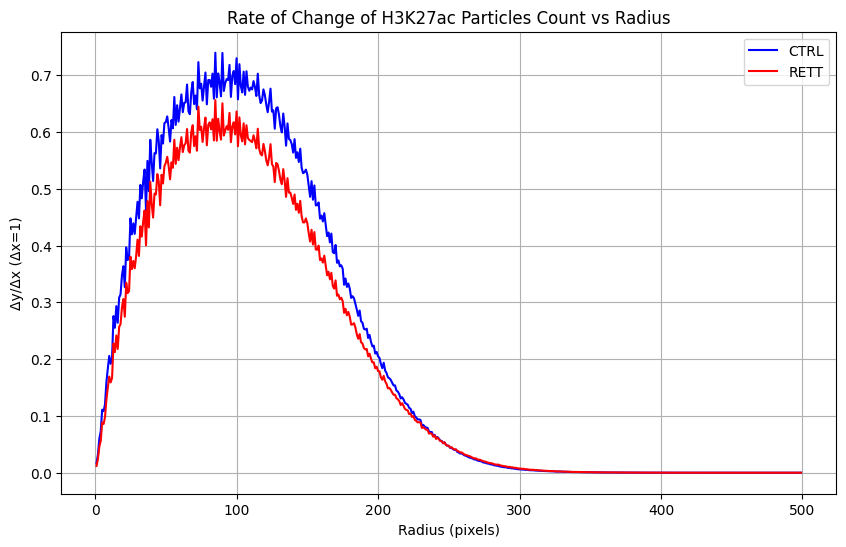

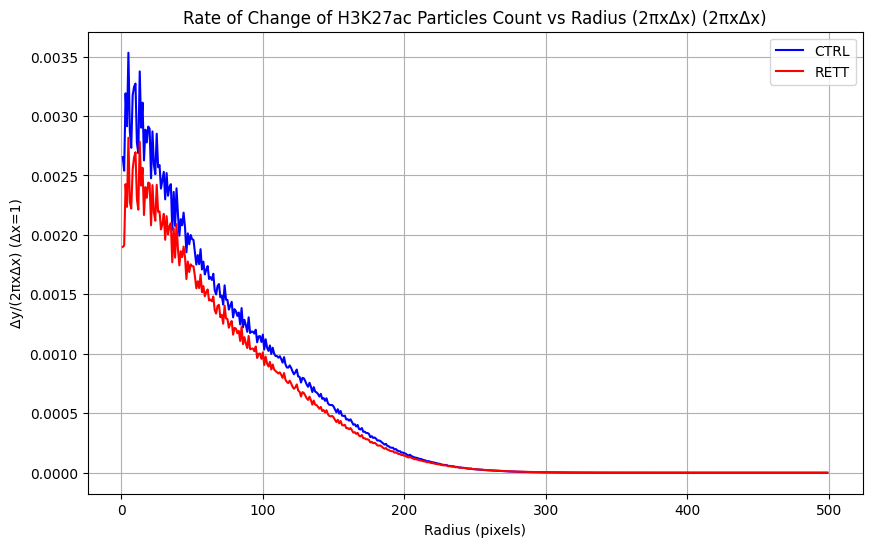

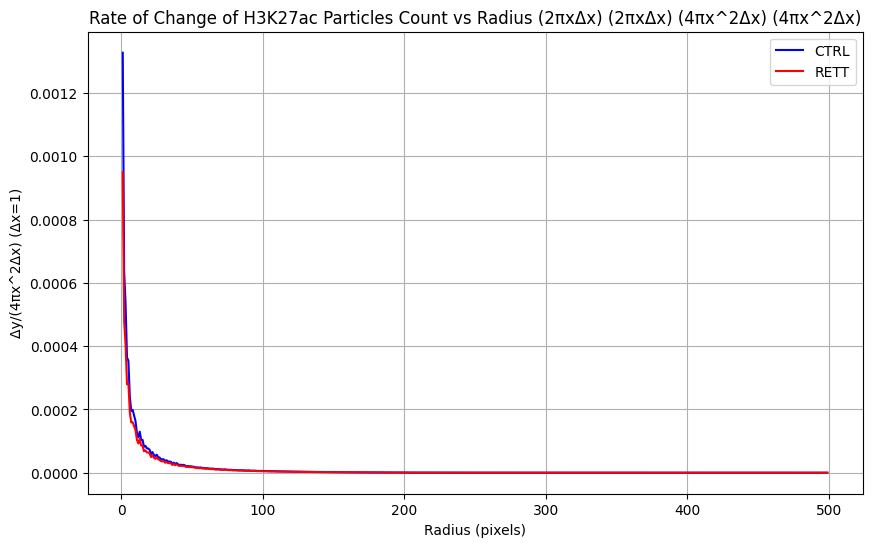

In [47]:
merge_ctrl_radius, merge_rett_radius = circle_radius(rett_metrics_co_localization['ctcf2h3k27ac_radius'], 
                                                     ctrl_metrics_co_localization['ctcf2h3k27ac_radius'], 
                                                     savepath, 
                                                     title="Average Number of H3K27ac Particles within Different Radii around CTCF Particles", 
                                                     ylim=150)
circle_radius_deltax(merge_ctrl_radius, merge_rett_radius, savepath, 
                     title='Rate of Change of H3K27ac Particles Count vs Radius',
                     delta_x=1, rett="RETT")

# VPA

In [48]:
datapath = '/Users/Alpaca/Desktop/Github/disease_epigenome/results_VPA/Biomarker/new_results'
    
with open(f'{datapath}/CTRL_colocation.pkl', 'rb') as f:
    ctrl_metrics_co_localization = pickle.load(f)
with open(f'{datapath}/VPA_colocation.pkl', 'rb') as f:
    rett_metrics_co_localization = pickle.load(f)

ctrl_h3k27ac2ctcf_mindist = list(itertools.chain(*ctrl_metrics_co_localization['h3k27ac2ctcf_mindist']))
rett_h3k27ac2ctcf_mindist = list(itertools.chain(*rett_metrics_co_localization['h3k27ac2ctcf_mindist']))
print(f"h3k27ac2ctcf nearest_distances ctrl: {len(ctrl_h3k27ac2ctcf_mindist)}")
print(f"h3k27ac2ctcf nearest_distances rett: {len(rett_h3k27ac2ctcf_mindist)}")

ctrl_ctcf2h3k27ac_mindist = list(itertools.chain(*ctrl_metrics_co_localization['ctcf2h3k27ac_mindist']))
rett_ctcf2h3k27ac_mindist = list(itertools.chain(*rett_metrics_co_localization['ctcf2h3k27ac_mindist']))
print(f"ctcf2h3k27ac nearest_distances ctrl: {len(ctrl_ctcf2h3k27ac_mindist)}")
print(f"ctcf2h3k27ac nearest_distances rett: {len(rett_ctcf2h3k27ac_mindist)}")

h3k27ac2ctcf nearest_distances ctrl: 366449
h3k27ac2ctcf nearest_distances rett: 1301732
ctcf2h3k27ac nearest_distances ctrl: 1177966
ctcf2h3k27ac nearest_distances rett: 2323600


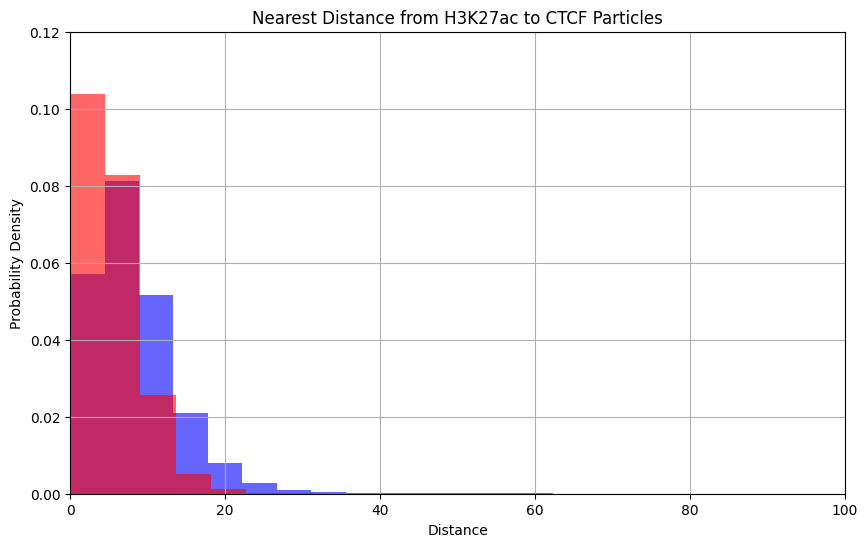

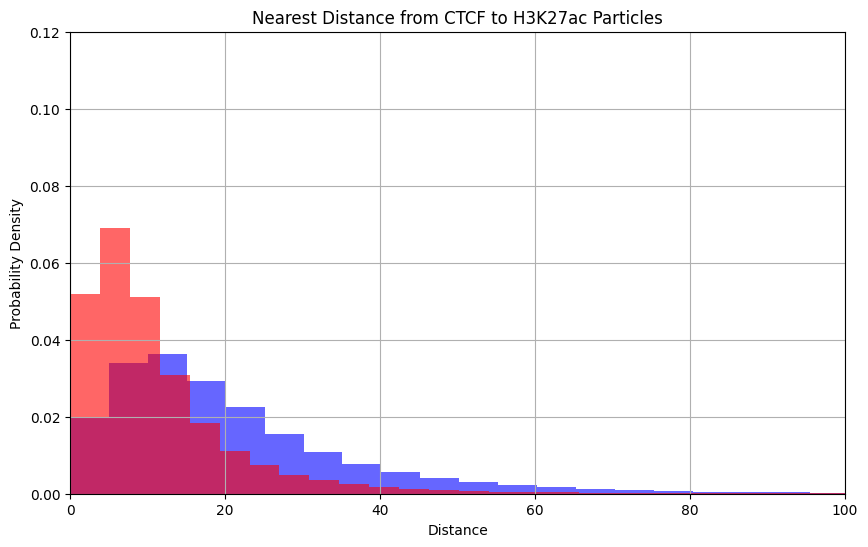

In [49]:
homepath = "/Users/Alpaca/Desktop/Github/disease_epigenome"
savepath = f"{homepath}/results_VPA/Biomarker/results_figures"
both_nearest_distances_plot(ctrl_h3k27ac2ctcf_mindist, rett_h3k27ac2ctcf_mindist, savepath, 
                            title="Nearest Distance from H3K27ac to CTCF Particles")

both_nearest_distances_plot(ctrl_ctcf2h3k27ac_mindist, rett_ctcf2h3k27ac_mindist, savepath,
                            title="Nearest Distance from CTCF to H3K27ac Particles")

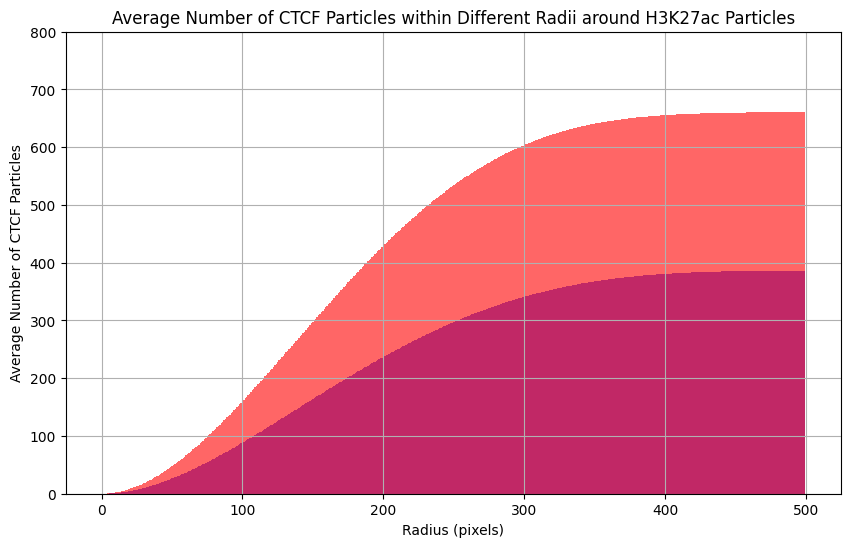

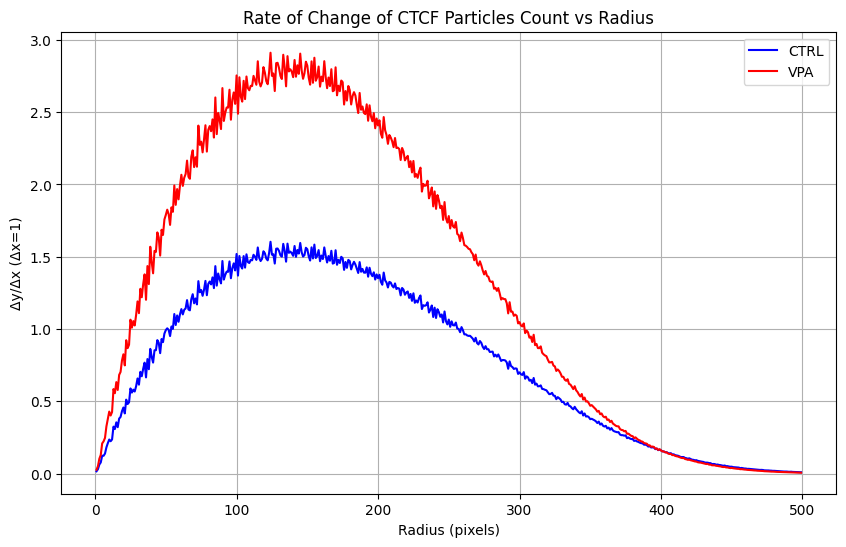

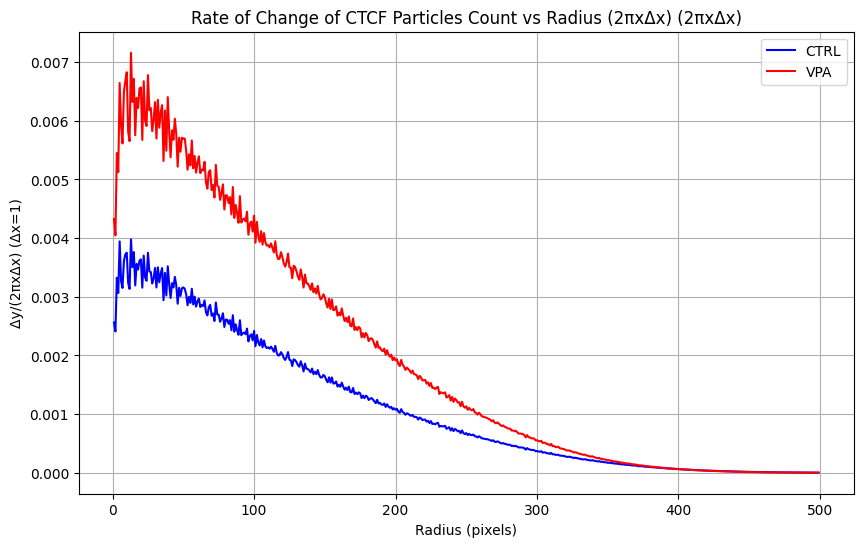

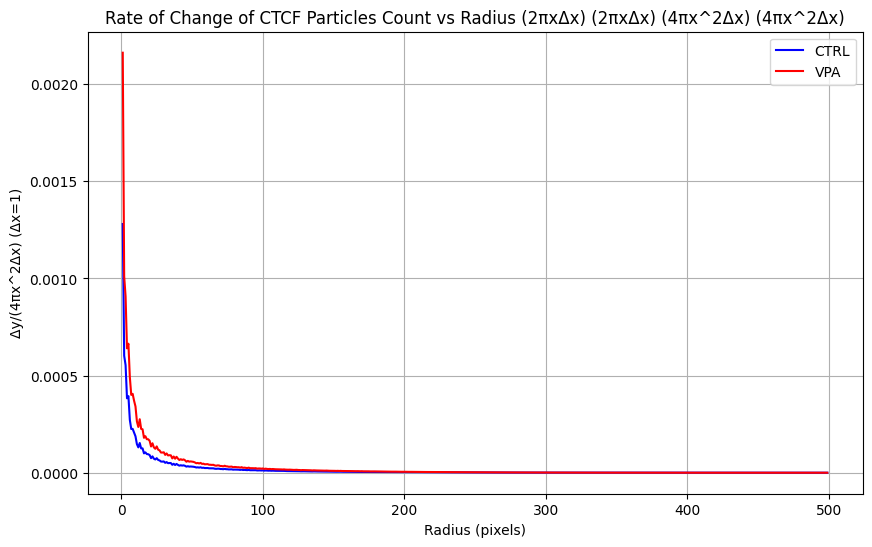

In [54]:
merge_ctrl_radius, merge_rett_radius = circle_radius(rett_metrics_co_localization['h3k27ac2ctcf_radius'], 
                                                     ctrl_metrics_co_localization['h3k27ac2ctcf_radius'], 
                                                     savepath, 
                                                     title="Average Number of CTCF Particles within Different Radii around H3K27ac Particles", 
                                                     ylim=800)
circle_radius_deltax(merge_ctrl_radius, merge_rett_radius, savepath, 
                     title='Rate of Change of CTCF Particles Count vs Radius', 
                     delta_x=1, rett="VPA")

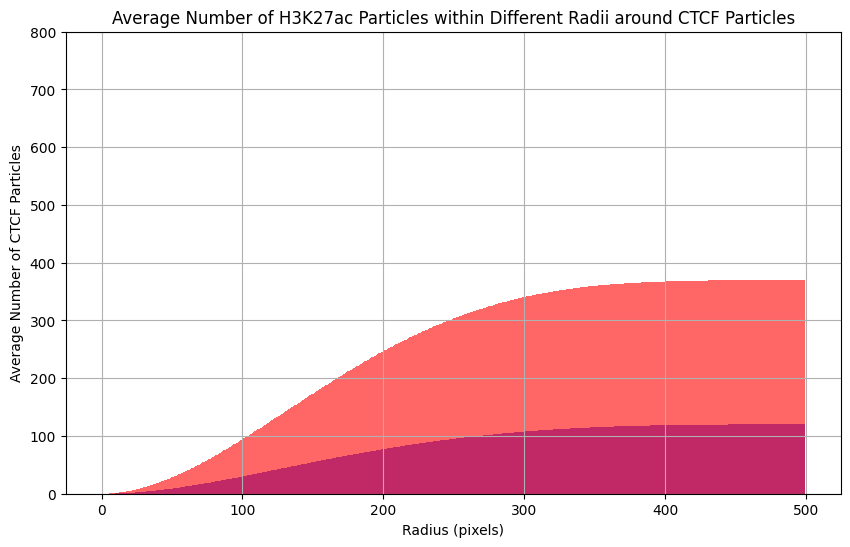

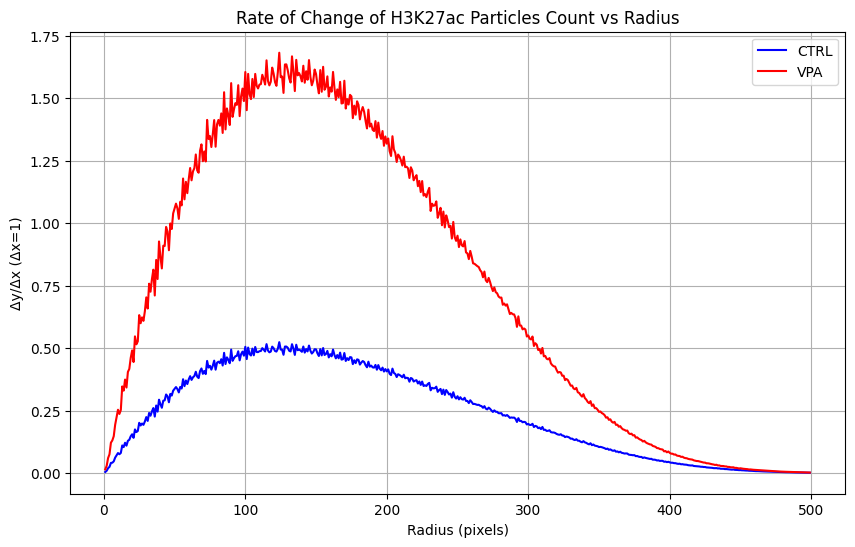

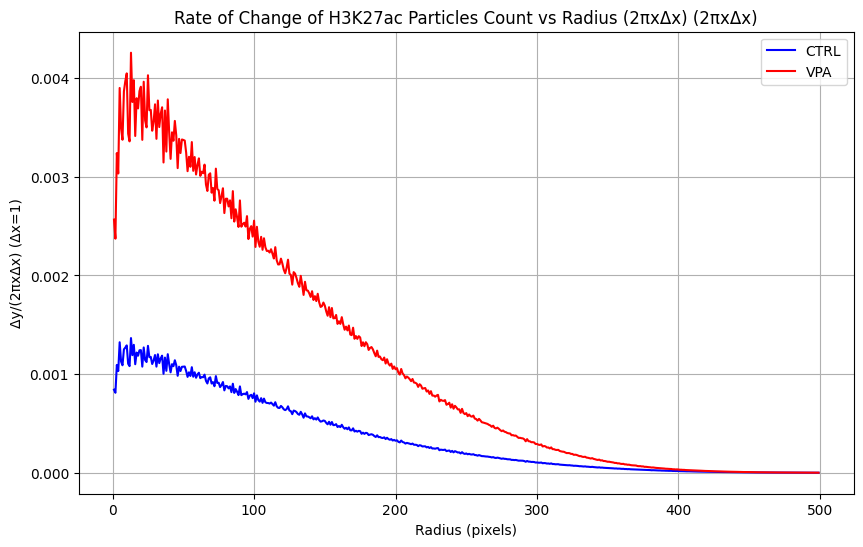

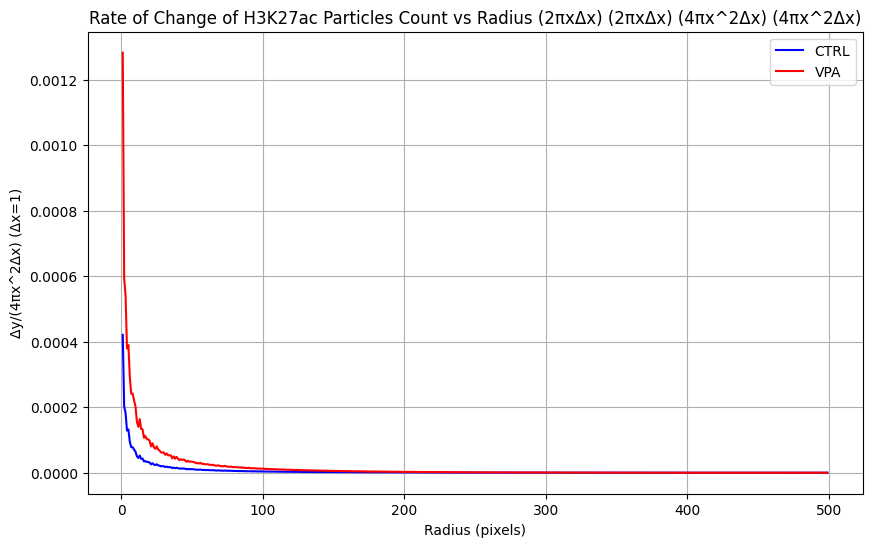

In [55]:
merge_ctrl_radius, merge_rett_radius = circle_radius(rett_metrics_co_localization['ctcf2h3k27ac_radius'], 
                                                     ctrl_metrics_co_localization['ctcf2h3k27ac_radius'], 
                                                     savepath, 
                                                     title="Average Number of H3K27ac Particles within Different Radii around CTCF Particles", 
                                                     ylim=800)
circle_radius_deltax(merge_ctrl_radius, merge_rett_radius, savepath, 
                     title='Rate of Change of H3K27ac Particles Count vs Radius',
                     delta_x=1, rett="VPA")